Clasificación de Imágenes de Autos con MLP (CIFAR-10)
Autor: Juan Ángel Vizcarra Aldana**

Este notebook entrena un modelo de red neuronal (MLP) usando el dataset CIFAR-10 para identificar imágenes de automóviles (clase 1) contra otras clases (clase 0).

 ¿Qué hace este notebook?
-Carga y normaliza el dataset CIFAR-10.
 Convierte la tarea en un problema de clasificación binaria (Auto vs No Auto). Entrena un modelo de red neuronal.
Muestra métricas y gráficas de desempeño.
Ejecuta las celdas en orden para asegurar el correcto funcionamiento.


# Clasificación de Imágenes de Autos con MLP (CIFAR-10)
**Autor: Juan Ángel Vizcarra Aldana**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_bin = (y_train.flatten() == 1).astype(int)
y_test_bin = (y_test.flatten() == 1).astype(int)
y_train_cat = to_categorical(y_train_bin, 2)
y_test_cat = to_categorical(y_test_bin, 2)

In [3]:
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

c:\Users\juanu\OneDrive\Escritorio\IA-JUANVIZCARRA\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 819,842 (3.13 MB)

 Trainable params: 819,842 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_mlp = mlp_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, 
                          validation_split=0.2, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8934 - loss: 0.3313 - val_accuracy: 0.9048 - val_loss: 0.2601
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9079 - loss: 0.2530 - val_accuracy: 0.9103 - val_loss: 0.2422
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9128 - loss: 0.2318 - val_accuracy: 0.9159 - val_loss: 0.2319
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9145 - loss: 0.2255 - val_accuracy: 0.9172 - val_loss: 0.2228
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9210 - loss: 0.2106 - val_accuracy: 0.9195 - val_loss: 0.2181
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9238 - loss: 0.2051 - val_accuracy: 0.9199 - val_loss: 0.2129
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9225 - loss: 0.2015 - val_accuracy: 0.9199 - val_loss: 0.2270
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9252 - loss: 0.1964 - val_accuracy: 0

In [5]:
loss, acc = mlp_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Precisión en test (MLP): {acc:.4f}")

Precisión en test (MLP): 0.9228


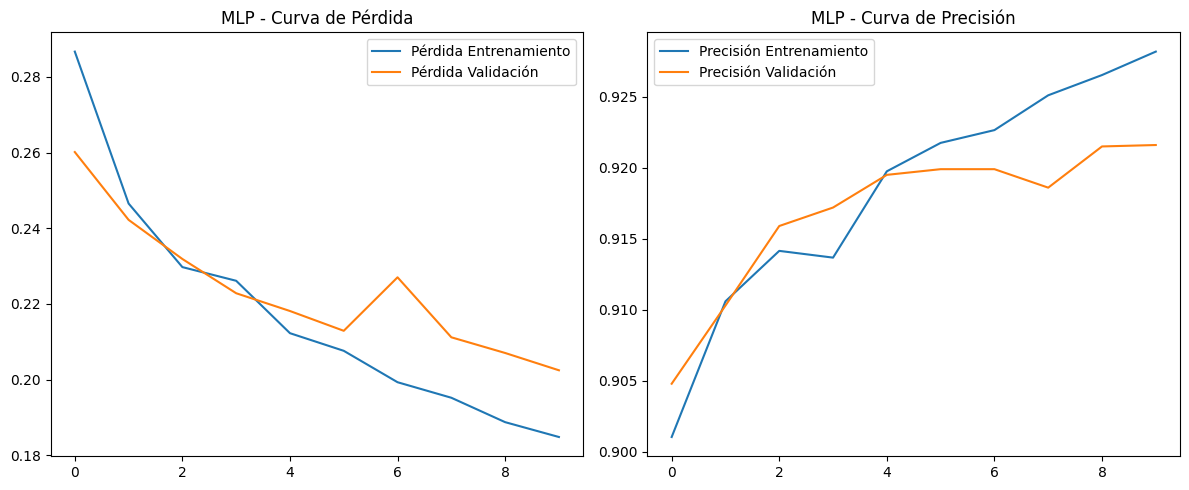

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida Validación')
plt.title('MLP - Curva de Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_mlp.history['val_accuracy'], label='Precisión Validación')
plt.title('MLP - Curva de Precisión')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


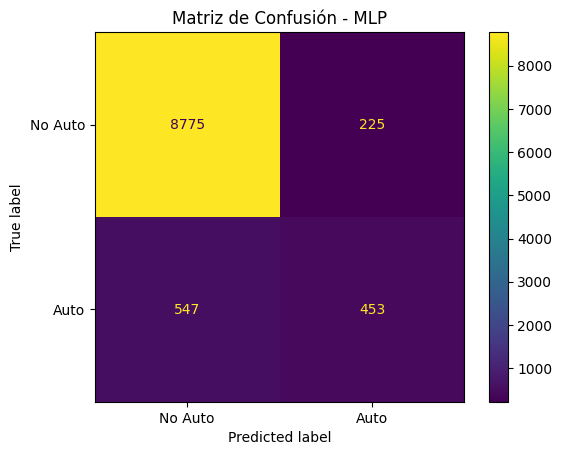

In [7]:
y_pred_mlp = mlp_model.predict(x_test).argmax(axis=1)
disp = ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_mlp, display_labels=['No Auto', 'Auto'])
disp.ax_.set_title('Matriz de Confusión - MLP')
plt.show()

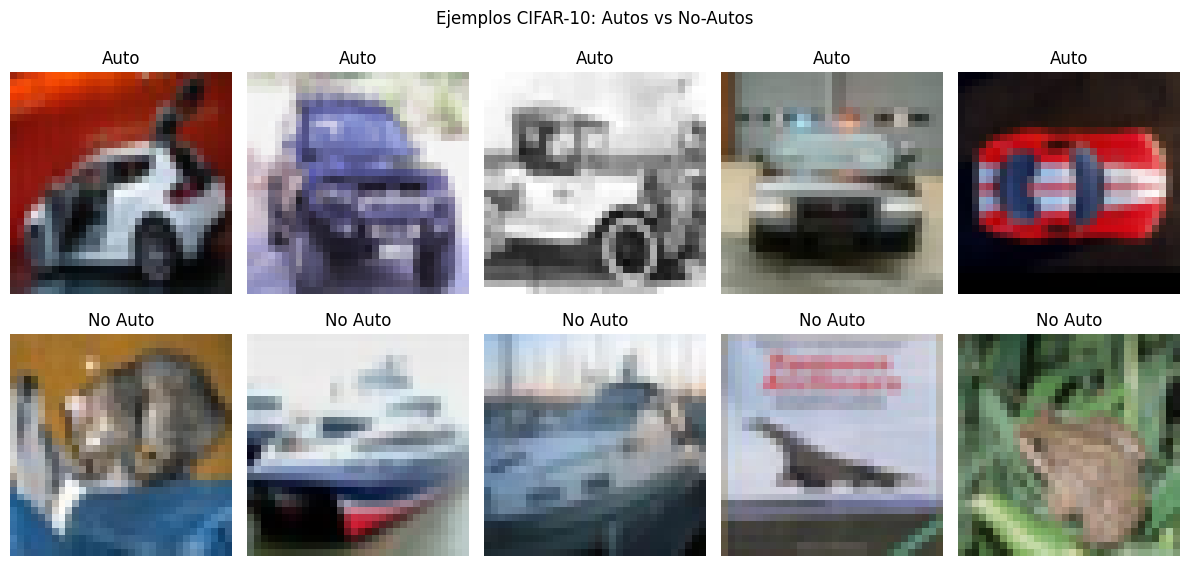

In [8]:
# Mostrar 10 imágenes del conjunto de test: 5 autos y 5 no-autos
import matplotlib.pyplot as plt

clases = {1: "Auto", 0: "No Auto"}  # 1 = coche en CIFAR-10

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
autos_mostrados = 0
no_autos_mostrados = 0
i = 0

while autos_mostrados < 5 or no_autos_mostrados < 5:
    img = x_test[i]
    etiqueta = y_test_bin[i]

    if etiqueta == 1 and autos_mostrados < 5:
        axs[0, autos_mostrados].imshow(img)
        axs[0, autos_mostrados].set_title(f"{clases[1]}")
        axs[0, autos_mostrados].axis('off')
        autos_mostrados += 1
    elif etiqueta == 0 and no_autos_mostrados < 5:
        axs[1, no_autos_mostrados].imshow(img)
        axs[1, no_autos_mostrados].set_title(f"{clases[0]}")
        axs[1, no_autos_mostrados].axis('off')
        no_autos_mostrados += 1

    i += 1

plt.suptitle("Ejemplos CIFAR-10: Autos vs No-Autos")
plt.tight_layout()
plt.show()
